In [2]:
# train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import hstack
import numpy as np

In [3]:

df = pd.read_csv('../data/interim/products.csv')
X = df[['name','brandName','imageUrl']]
Y = df['categoryName']

X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

250

In [57]:
X_test.head()

,name,brandName,imageUrl
142,Guerlain La Petite Robe Noire Eau De Parfum 75ml,Guerlain,https://static.prod.qogita.com/files/images/va...
6,Pupa Multiplay Triple Purpose Eye Pencil #04 1...,Pupa Milano,https://static.prod.qogita.com/files/images/va...
97,Carolina Herrera Bad Boy Eau De Toilette Spray...,Carolina Herrera,https://static.prod.qogita.com/files/images/va...
60,Maybelline Lash Sensational Full Fan Effect Ma...,Maybelline New York,https://static.prod.qogita.com/files/images/va...
112,Acqua Di Parma Mediterranean Bergamot Of Calab...,Acqua di Parma,https://static.prod.qogita.com/files/images/va...


In [58]:
# converting Y using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)


In [59]:
# transforming X using TfidfVectorizer and preprocessing using nltk
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /home/kamesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kamesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kamesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/kamesh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [60]:
# preprocessing function
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # remove punctuation/numbers
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

In [61]:
X_train['name'] = X_train['name'].apply(preprocess_nltk)

In [62]:
X_train.head()

,name,brandName,imageUrl
132,boucheron oud de carthage eau de parfum,Boucheron,https://static.prod.qogita.com/files/images/va...
225,afnan ornament pour homme eau de parfum men,Afnan,https://static.prod.qogita.com/files/images/va...
238,redken frizz dismiss instant deflate haircare ...,Redken,https://static.prod.qogita.com/files/images/va...
119,tom ford black orchid eau de parfum woman,Tom Ford,https://static.prod.qogita.com/files/images/va...
136,shiseido waso shot serum,Shiseido,https://static.prod.qogita.com/files/images/va...


## transforming brandName

In [63]:
X_train['brandName'].mode()

0    Sisley
Name: brandName, dtype: object

In [68]:
# using LabelEncoder to transform the categorical variables in brandName
from sklearn.preprocessing import OrdinalEncoder
oebrand_name = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)


In [72]:
X_train['brandName'] = oebrand_name.fit_transform(X_train['brandName'].values.reshape(-1,1))

In [74]:
X_train['brandName'].shape

(200,)

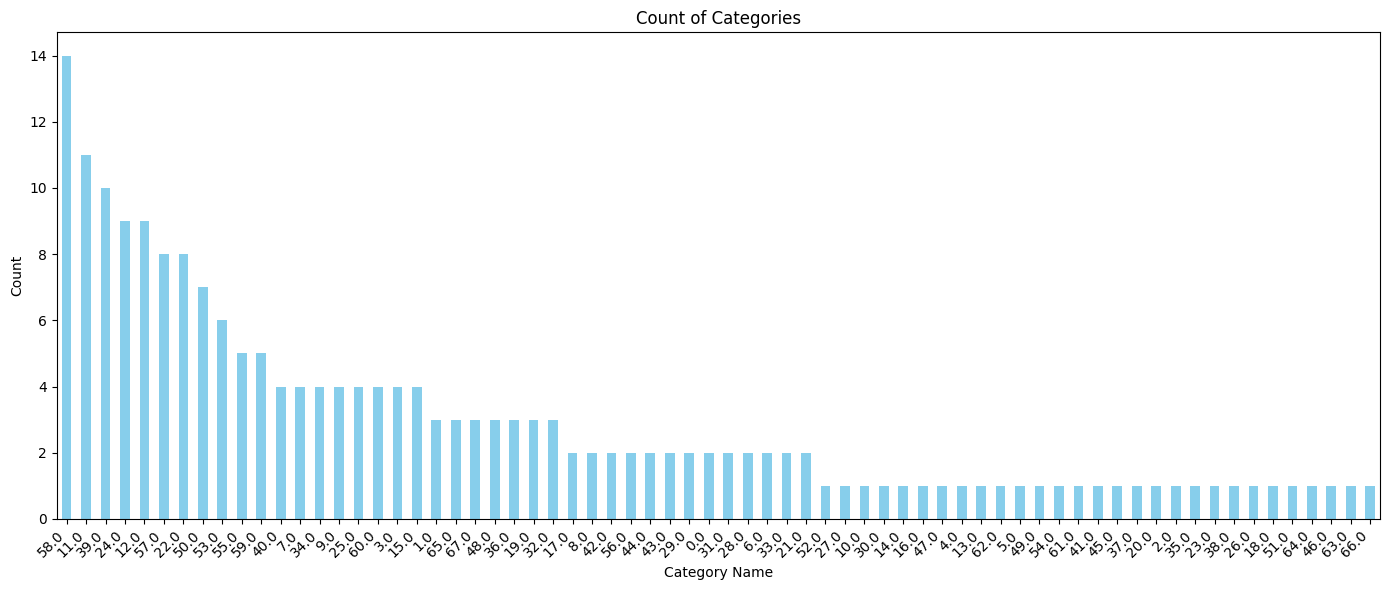

In [75]:
brand_name_counts= X_train['brandName'].value_counts()
# Plot the counts as a bar chart
brand_name_counts.plot(kind='bar', figsize=(14, 6), color='skyblue')
plt.title('Count of Categories')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
X_train.head()

,name,brandName,imageUrl
132,boucheron oud de carthage eau de parfum,8.0,https://static.prod.qogita.com/files/images/va...
225,afnan ornament pour homme eau de parfum men,1.0,https://static.prod.qogita.com/files/images/va...
238,redken frizz dismiss instant deflate haircare ...,52.0,https://static.prod.qogita.com/files/images/va...
119,tom ford black orchid eau de parfum woman,59.0,https://static.prod.qogita.com/files/images/va...
136,shiseido waso shot serum,57.0,https://static.prod.qogita.com/files/images/va...


In [77]:
# create TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1,3))

In [78]:
X_train_tf_idf = tfidf_vectorizer.fit_transform(X_train['name'])

In [79]:
brand_feature = X_train["brandName"].values.reshape(-1, 1)

In [80]:
brand_feature

array([[ 8.],
       [ 1.],
       [52.],
       [59.],
       [57.],
       [14.],
       [32.],
       [58.],
       [31.],
       [50.],
       [12.],
       [25.],
       [10.],
       [28.],
       [ 0.],
       [27.],
       [53.],
       [ 4.],
       [60.],
       [30.],
       [11.],
       [58.],
       [47.],
       [12.],
       [53.],
       [ 1.],
       [11.],
       [11.],
       [40.],
       [15.],
       [43.],
       [31.],
       [19.],
       [58.],
       [42.],
       [67.],
       [60.],
       [57.],
       [24.],
       [48.],
       [55.],
       [11.],
       [15.],
       [22.],
       [22.],
       [50.],
       [12.],
       [42.],
       [65.],
       [24.],
       [24.],
       [29.],
       [19.],
       [53.],
       [12.],
       [58.],
       [36.],
       [16.],
       [39.],
       [21.],
       [11.],
       [57.],
       [ 9.],
       [15.],
       [39.],
       [22.],
       [56.],
       [55.],
       [58.],
       [44.],
       [13.],
      

In [81]:
# Combine
from scipy import sparse
X_final = hstack([X_train_tf_idf, sparse.csr_matrix(brand_feature)])

In [92]:
X_final.shape

(200, 1001)

In [83]:
y_train_transformed

array([15, 15, 35, 15, 32, 16, 38, 15,  5, 20, 27, 14, 16, 15, 16, 16, 11,
       16, 16, 15, 12, 15, 51,  1, 33, 15, 42, 43, 15, 16, 29, 15, 12, 23,
       47, 15, 15, 24,  1, 15, 57, 25, 15, 33, 33, 45, 25, 56, 34, 16, 20,
       16, 26, 37, 18, 23,  8, 13, 28, 15,  9,  6, 15, 16, 15, 33, 24, 58,
        3, 46, 16,  2, 33, 20, 16, 15, 15, 15,  4, 53, 41, 54, 45, 20, 16,
       21,  1, 25, 37,  6, 46, 16, 16, 16, 34, 15, 15,  7, 35,  0, 15, 24,
       30, 45, 15, 24, 24, 34, 11, 15, 36, 11, 44, 15, 28, 15, 33, 15, 16,
       33, 15, 25, 31, 33, 16,  5, 23, 15, 16, 16, 15, 15, 14, 35, 15, 15,
       13, 52, 15, 10, 15, 15, 21, 24, 23, 18, 15, 45, 15, 39,  6, 15, 50,
       15, 23,  1, 15, 40, 16, 15, 46, 45, 19, 16, 23,  5, 45, 37, 58, 49,
       55, 50, 16, 51, 33, 42,  7, 15, 48, 16, 16,  8, 15,  5, 27, 46, 29,
       30, 15, 10, 22, 45, 29, 15, 29, 49, 17, 11, 30, 16])

# Training without the images data

In [84]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=len(le.classes_)
)

model.fit(X_final, y_train_transformed)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=59, ...)

# Testing on data

In [85]:
X_test_transformed = tfidf_vectorizer.transform(X_test['name'])

In [87]:
test_brands = oebrand_name.transform(X_test['brandName'].values.reshape(-1,1))

In [91]:
pd.DataFrame(test_brands).isna().sum()

0    6
dtype: int64

In [93]:
X_test_final = hstack([X_test_transformed, sparse.csr_matrix(test_brands)])

In [98]:
y_test_transformed = le.transform(y_test)

ValueError: y contains previously unseen labels: 'Makeup Remover'

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test_final))

0.0